### Introduction

This report details the exploratory data analysis performed on the Glassdoor review dataset. The dataset contains 805,051 entries, each providing insights into employees' perceptions of their workplaces. Our analysis aims to uncover underlying patterns to derive insights into factors influencing employee satisfaction and the propensity to recommend the company.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("glassdoor_reviews.csv")

In [4]:
cols = df.columns
cols

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values',
       'diversity_inclusion', 'career_opp', 'comp_benefits', 'senior_mgmt',
       'recommend', 'ceo_approv', 'outlook', 'headline', 'pros', 'cons'],
      dtype='object')

In [5]:
for col in cols: 
    print(df[col].value_counts())

firm
IBM                         60436
McDonald-s                  49450
Deloitte                    46995
EY                          34050
PwC                         33227
                            ...  
i-Net-Solution                  4
Health-Protection-Agency        4
The-Survey-Association          3
NPSA                            2
UKCIL                           1
Name: count, Length: 428, dtype: int64
date_review
2021-01-13    1761
2021-01-11    1713
2021-01-12    1629
2021-01-19    1613
2021-01-14    1581
              ... 
2008-03-24       1
2008-02-05       1
2008-02-11       1
2008-03-04       1
2021-06-08       1
Name: count, Length: 4813, dtype: int64
job_title
 Anonymous Employee            162649
                                79065
 Manager                        14906
 Consultant                     12559
 Software Engineer              10797
                                ...  
 JOJO                               1
 Custer Assistant                   1
 Sales 

cons
None that I can think of                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1156
None that I can think of.                                                                                                                                                                                                                                                  

In [6]:
df.shape

(838566, 18)

### Handling Null Values

In [7]:
df_percentage = round(df.isnull().sum()/len(df)*100)
df_percentage

firm                    0.0
date_review             0.0
job_title               0.0
current                 0.0
location               35.0
overall_rating          0.0
work_life_balance      18.0
culture_values         23.0
diversity_inclusion    84.0
career_opp             18.0
comp_benefits          18.0
senior_mgmt            19.0
recommend               0.0
ceo_approv              0.0
outlook                 0.0
headline                0.0
pros                    0.0
cons                    0.0
dtype: float64

In [8]:
# As major portion of column diversity_inclusion is null (~84%), we decide to drop that column 
df1 = df.drop(['diversity_inclusion'], axis = 1)
df1.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values', 'career_opp',
       'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv', 'outlook',
       'headline', 'pros', 'cons'],
      dtype='object')

In [9]:
# To handle the null values in columns [location, work_life_balance, culture_values, career_opp, comp_benefits, senior_mgmt], we can replace the null values as 'unknown' for initial analysis
def fill_missing_values(x):
    if x.dtype == 'object':
        return x.fillna('Unknown')
    elif pd.api.types.is_numeric_dtype(x):
        return x.fillna(0)
    else:
        return x

In [10]:
# To handle the null values in columns [location, work_life_balance, culture_values, career_opp, comp_benefits, senior_mgmt], we can replace the null values as 'unknown' for initial analysis
def fill_missing_values(x):
    if x.dtype == 'object':
        return x.fillna('Unknown')
    elif pd.api.types.is_numeric_dtype(x):
        return x.fillna(0)
    else:
        return x

['location',
 'work_life_balance',
 'culture_values',
 'career_opp',
 'comp_benefits',
 'senior_mgmt',
 'headline',
 'pros',
 'cons']

In [11]:
for column in cols_to_fill:
    df1[column] = fill_missing_values(df1[column])

In [12]:
df1_percentage = round(df1.isnull().sum()/len(df1)*100)
df1_percentage

firm                 0.0
date_review          0.0
job_title            0.0
current              0.0
location             0.0
overall_rating       0.0
work_life_balance    0.0
culture_values       0.0
career_opp           0.0
comp_benefits        0.0
senior_mgmt          0.0
recommend            0.0
ceo_approv           0.0
outlook              0.0
headline             0.0
pros                 0.0
cons                 0.0
dtype: float64

In [13]:
df1.shape

(838566, 17)

In [14]:
df1.drop_duplicates(inplace = True)

In [15]:
df1.shape

(805051, 17)

#### Encoding

In [16]:
def assign_dummies(value):
    mapping = {'v': 3, 'r': 2, 'o': 1 }
    return mapping.get(value, -1)


In [17]:
for col in ['recommend', 'ceo_approv', 'outlook']:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(-1).astype(int)


In [18]:
cols_to_apply = ['recommend','ceo_approv','outlook']
cols_to_apply

['recommend', 'ceo_approv', 'outlook']

In [19]:
for val in cols_to_apply:
    df1[val] = df1[val].apply(assign_dummies)

In [20]:
cols_to_apply = ['recommend', 'ceo_approv', 'outlook']

# Print columns before applying the function
print("Columns before applying function:", df1.columns)
print("Data types before:", df1[cols_to_apply].dtypes)

for val in cols_to_apply:
    df1[val] = df1[val].apply(assign_dummies)

# Print columns after applying the function
print("Columns after applying function:", df1.columns)
print("Data types after:", df1[cols_to_apply].dtypes)

# Print the head of the DataFrame to see the changes
print(df1[cols_to_apply].head())

Columns before applying function: Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values', 'career_opp',
       'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv', 'outlook',
       'headline', 'pros', 'cons'],
      dtype='object')
Data types before: recommend     int64
ceo_approv    int64
outlook       int64
dtype: object
Columns after applying function: Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values', 'career_opp',
       'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv', 'outlook',
       'headline', 'pros', 'cons'],
      dtype='object')
Data types after: recommend     int64
ceo_approv    int64
outlook       int64
dtype: object
   recommend  ceo_approv  outlook
0         -1          -1       -1
1         -1          -1       -1
2         -1          -1       -1
3         -1          -1       -1
4         -1        

In [21]:
df1.describe()

overall_rating  work_life_balance  culture_values     career_opp  \
count   805051.000000      805051.000000   805051.000000  805051.000000   
mean         3.656927           2.770843        2.772768       2.850002   
std          1.177071           1.753719        1.903653       1.753030   
min          1.000000           0.000000        0.000000       0.000000   
25%          3.000000           1.000000        1.000000       1.000000   
50%          4.000000           3.000000        3.000000       3.000000   
75%          5.000000           4.000000        5.000000       4.000000   
max          5.000000           5.000000        5.000000       5.000000   

       comp_benefits    senior_mgmt  recommend  ceo_approv   outlook  
count  805051.000000  805051.000000   805051.0    805051.0  805051.0  
mean        2.792635       2.587022       -1.0        -1.0      -1.0  
std         1.710544       1.725174        0.0         0.0       0.0  
min         0.000000       0.000000       -1.0        -1.0      -1.0  
25%         1.000000       1.000000       -1.0        -1.0      -1.0  
50%         3.000000       3.000000       -1.0        -1.0      -1.0  
75%         4.000000       4.000000       -1.0        -1.0      -1.0  
max         5.000000       5.000000       -1.0        -1.0      -1.0

#### Visualizations 

In [22]:
numeric_cols = ['overall_rating', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits', 'senior_mgmt']
print("Data types before modification:")
print(df[numeric_cols].dtypes)

numeric_df = df1[numeric_cols]
print("Data types after modification:")
print(numeric_df.dtypes)

Data types before modification:
overall_rating         int64
work_life_balance    float64
culture_values       float64
career_opp           float64
comp_benefits        float64
senior_mgmt          float64
dtype: object
Data types after modification:
overall_rating         int64
work_life_balance    float64
culture_values       float64
career_opp           float64
comp_benefits        float64
senior_mgmt          float64
dtype: object


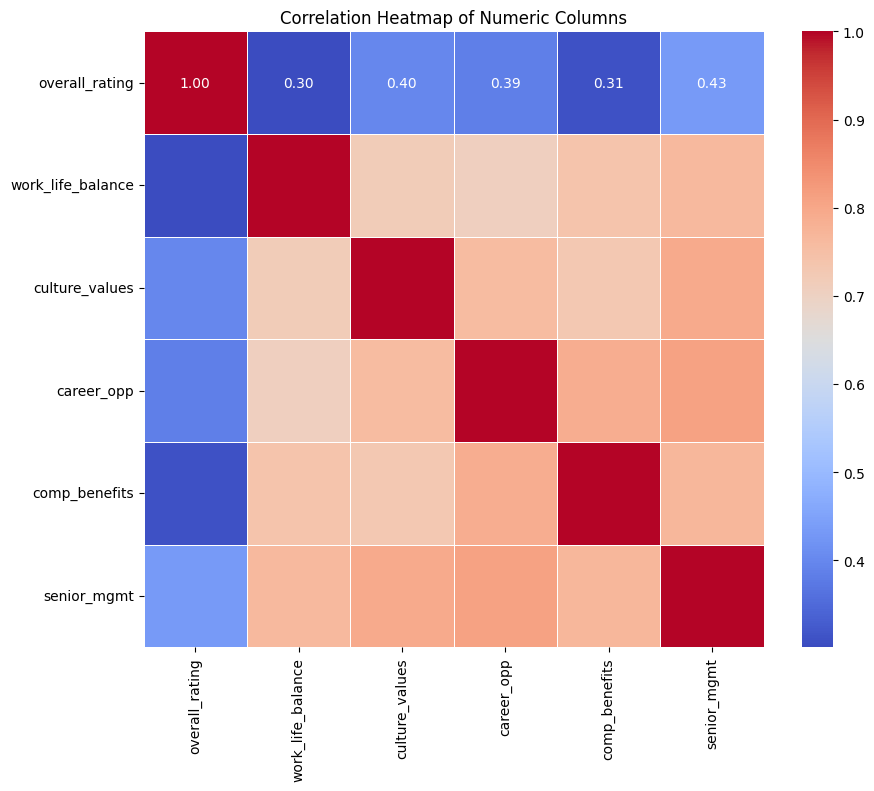

In [23]:
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

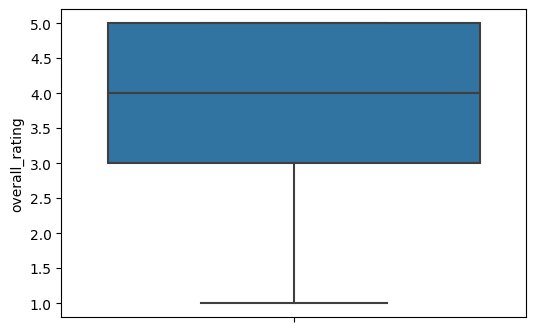

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df1,y='overall_rating')
plt.show()

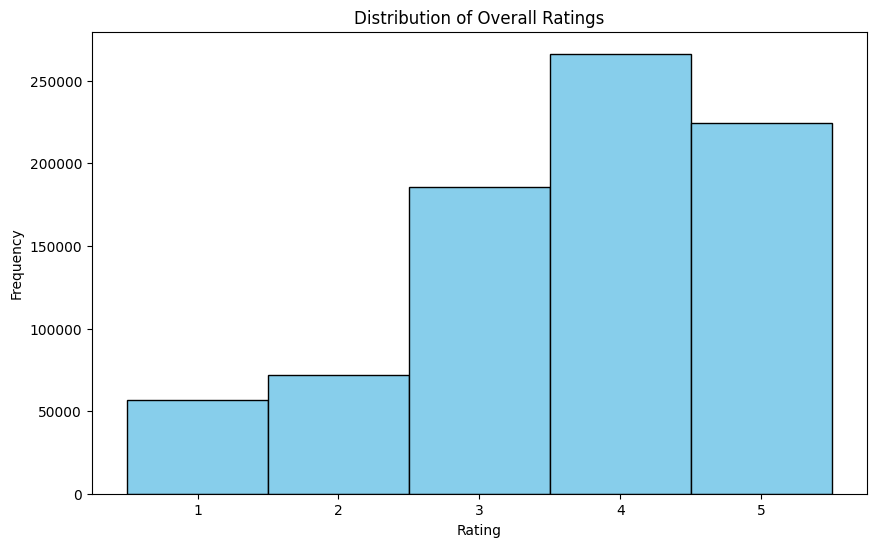

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df1['overall_rating'], bins=range(1, 7), align='left', color='skyblue', edgecolor='black')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(range(1, 6))
plt.show()

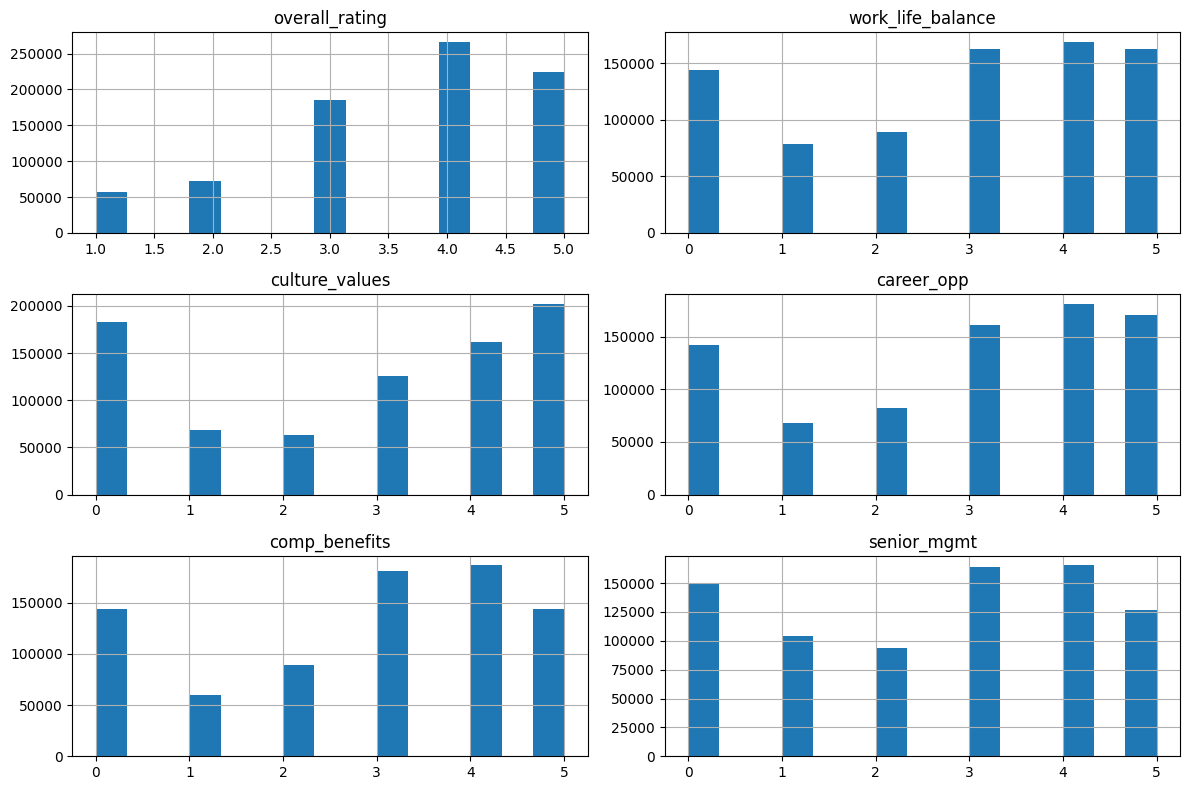

In [26]:
# Plotting histograms for each attribute
numeric_df.hist(bins=15, figsize=(12, 8))

# Display the histograms
plt.tight_layout()  # Adjust layout to fit the figure
plt.show()

#### Forecasting Overall Ratings by Firm

In [29]:
df1.columns

Index(['firm', 'date_review', 'job_title', 'current', 'location',
       'overall_rating', 'work_life_balance', 'culture_values', 'career_opp',
       'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv', 'outlook',
       'headline', 'pros', 'cons', 'job_title_encoded', 'location_encoded',
       'current_encoded'],
      dtype='object')

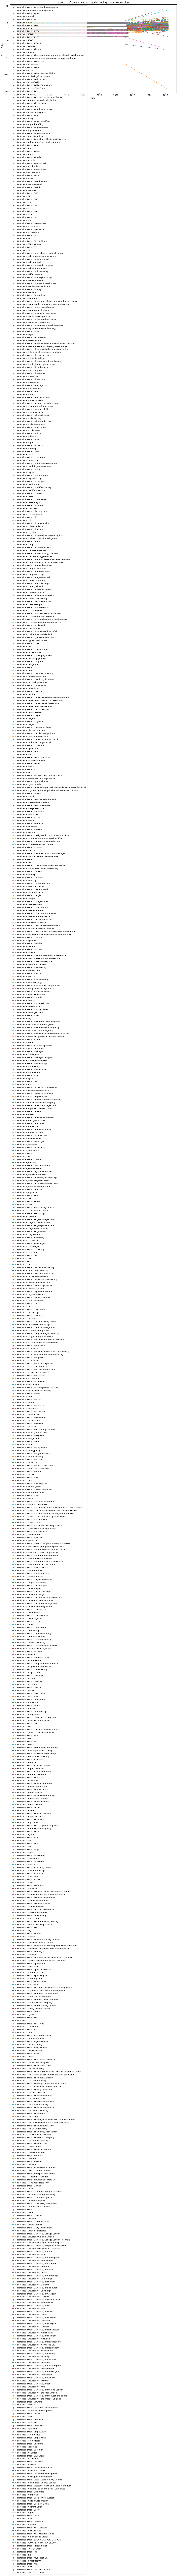

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


# Encoding categorical variables
label_encoders = {}  
for column in ['job_title', 'location', 'current']:
    le = LabelEncoder()
    df1[column + '_encoded'] = le.fit_transform(df1[column])
    label_encoders[column] = le 
    
# Convert the 'date_review' column to datetime format
df1['date_review'] = pd.to_datetime(df1['date_review'])

# Now calculate the 'time' column as days from the minimum date
df1['time'] = (df1['date_review'] - df1['date_review'].min()).dt.days

# Prepare the data
predictors = ['time', 'job_title_encoded', 'current_encoded', 'location_encoded',
              'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits',
              'senior_mgmt', 'recommend', 'ceo_approv', 'outlook']

# Group by firm
grouped = df1.groupby('firm')

# Create a figure for plotting
plt.figure(figsize=(15, 8))

for name, group in grouped:
    X = group[predictors]
    y = group['overall_rating']
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future values
    future_times = np.arange(1, 365 * 5 + 1, 1)
    future_dates = pd.date_range(start=group['date_review'].max() + pd.Timedelta(days=1), periods=len(future_times))
    X_future = pd.DataFrame({'time': future_times + group['time'].max()}, columns=['time'])

    # Assuming other features remain constant (simplistic)
    for col in predictors[1:]:  # Skip 'time' as it's already in X_future
        X_future[col] = group[col].mode()[0] if group[col].dtype == 'int' else group[col].mean()

    # Predicting future ratings
    future_ratings = model.predict(X_future)
    
    # Plotting
    plt.scatter(group['date_review'], y, label=f'Historical Data - {name}')
    plt.plot(future_dates, future_ratings, linestyle='--', label=f'Forecast - {name}')

plt.title('Forecast of Overall Ratings by Firm Using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Overall Rating')
plt.legend()
plt.show()

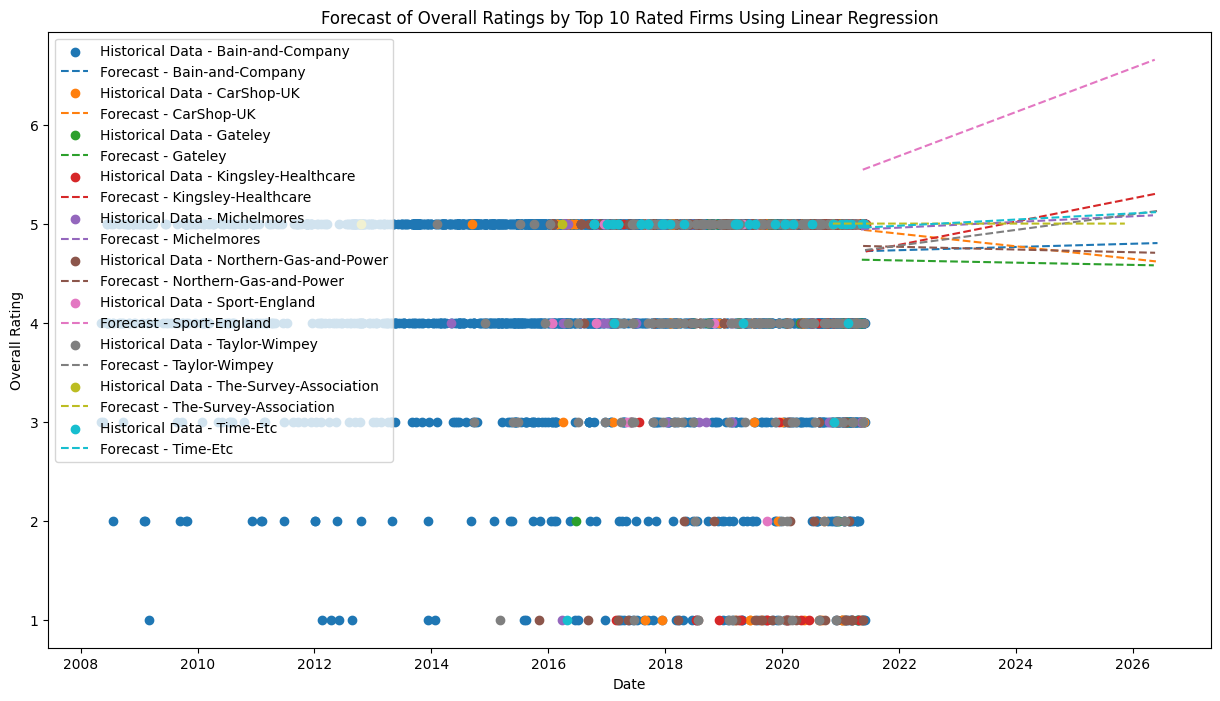

Bain-and-Company - 2020 Rating: 4.54, 2026 Predicted Rating: 4.80
CarShop-UK - 2020 Rating: 4.75, 2026 Predicted Rating: 4.64
Gateley - 2020 Rating: 4.12, 2026 Predicted Rating: 4.58
Kingsley-Healthcare - 2020 Rating: 4.73, 2026 Predicted Rating: 5.26
Michelmores - 2020 Rating: 3.80, 2026 Predicted Rating: 5.07
Northern-Gas-and-Power - 2020 Rating: 4.75, 2026 Predicted Rating: 4.71
Sport-England - 2020 Rating: 4.33, 2026 Predicted Rating: 6.57
Taylor-Wimpey - 2020 Rating: 4.70, 2026 Predicted Rating: 5.09
The-Survey-Association - 2020 Rating: 5.00, 2026 Predicted Rating: nan
Time-Etc - 2020 Rating: 4.67, 2026 Predicted Rating: 5.10


In [33]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Encoding categorical variables
label_encoders = {}
for column in ['job_title', 'location', 'current']:
    le = LabelEncoder()
    df1[column + '_encoded'] = le.fit_transform(df1[column])
    label_encoders[column] = le

# Prepare the data
predictors = ['time', 'job_title_encoded', 'current_encoded', 'location_encoded',
              'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits',
              'senior_mgmt', 'recommend', 'ceo_approv', 'outlook']

# Calculate average ratings for each firm
average_ratings = df1.groupby('firm')['overall_rating'].mean()

# Identify top 10 firms based on average ratings
top_10_firms = average_ratings.nlargest(10).index

# Filter grouped DataFrame to include only top 10 firms
grouped = df1[df1['firm'].isin(top_10_firms)].groupby('firm')

# Store predictions for 2020 and 2026
predictions = {}

# Create a figure for plotting
plt.figure(figsize=(15, 8))

for name, group in grouped:
    # Get the latest rating for 2022
    latest_2020_rating = group[group['date_review'].dt.year == 2020]['overall_rating'].mean() if not group[group['date_review'].dt.year == 2020].empty else np.nan
    
    X = group[predictors]
    y = group['overall_rating']
    
    # Fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future values
    last_date = group['date_review'].max()
    future_times = np.arange(1, 365 * 5 + 1, 1)
    future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(future_times), freq='D')
    X_future = pd.DataFrame({'time': future_times + group['time'].max()}, columns=['time'])

    # Assuming other features remain constant
    for col in predictors[1:]:  # Skip 'time' as it's already in X_future
        X_future[col] = group[col].mode()[0] if group[col].dtype == 'int' else group[col].mean()

    # Predicting future ratings
    future_ratings = model.predict(X_future)

    # Predicted rating for 2026
    future_dates_2026 = future_dates.year == 2026
    if np.any(future_dates_2026):
        predicted_2026_rating = future_ratings[future_dates_2026][0]
    else:
        predicted_2026_rating = np.nan  # Handle case where 2026 is not covered

    # Store predictions
    predictions[name] = {'2020': latest_2020_rating, '2026': predicted_2026_rating}
    
    # Plotting
    plt.scatter(group['date_review'], y, label=f'Historical Data - {name}')
    plt.plot(future_dates, future_ratings, linestyle='--', label=f'Forecast - {name}')

plt.title('Forecast of Overall Ratings by Top 10 Rated Firms Using Linear Regression')
plt.xlabel('Date')
plt.ylabel('Overall Rating')
plt.legend()
plt.show()

# Displaying the predictions for 2022 and 2026 for each top 10 firm
for firm, ratings in predictions.items():
    print(f"{firm} - 2020 Rating: {ratings['2020']:.2f}, 2026 Predicted Rating: {ratings['2026']:.2f}")

#### Predicting Employee's likelihood to recommend the company

In [34]:
X = df1.drop(['overall_rating','date_review','pros','cons', 'current','job_title', 'location'], axis=1)
y = df1['overall_rating']

In [35]:
# splitting dataset into training and testing data 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [36]:
X_train.shape, y_train.shape

((563535, 14), (563535,))

In [37]:
X_test.shape, y_test.shape

((241516, 14), (241516,))

In [38]:
X_train.dtypes

firm                  object
work_life_balance    float64
culture_values       float64
career_opp           float64
comp_benefits        float64
senior_mgmt          float64
recommend              int64
ceo_approv             int64
outlook                int64
headline              object
job_title_encoded      int64
location_encoded       int64
current_encoded        int64
time                   int64
dtype: object

In [39]:
import category_encoders as ce

In [40]:
X_train.columns

Index(['firm', 'work_life_balance', 'culture_values', 'career_opp',
       'comp_benefits', 'senior_mgmt', 'recommend', 'ceo_approv', 'outlook',
       'headline', 'job_title_encoded', 'location_encoded', 'current_encoded',
       'time'],
      dtype='object')

In [41]:
encoder = ce.OrdinalEncoder(cols=['firm', 'work_life_balance', 'culture_values', 'career_opp', 'comp_benefits',
       'senior_mgmt', 'recommend', 'ceo_approv', 'outlook', 'headline' ])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

#### Predicting Overall Employee Satisfaction

In [42]:
from sklearn.ensemble import RandomForestClassifier

clf_en = RandomForestClassifier(criterion = 'entropy', max_depth = 10, random_state=0)
# model fitting 
clf_en.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, random_state=0)

In [43]:
y_pred_en = clf_en.predict(X_test)

In [44]:
# checking accuracy score 
from sklearn.metrics import accuracy_score 
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5859


In [45]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array([3, 1, 4, ..., 4, 4, 4])

In [46]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.5996
Test set score: 0.5859


In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[10024  2010  2889  1721   301]
 [ 2912  3490 11590  3257   366]
 [  953  1472 27905 23009  2338]
 [  143   135  9594 57728 11909]
 [  116    56  1824 23411 42363]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       0.71      0.59      0.64     16945
           2       0.49      0.16      0.24     21615
           3       0.52      0.50      0.51     55677
           4       0.53      0.73      0.61     79509
           5       0.74      0.63      0.68     67770

    accuracy                           0.59    241516
   macro avg       0.60      0.52      0.54    241516
weighted avg       0.59      0.59      0.58    241516

